# Crack Model Testing


### Requirements >= Tensorflow-2.9

### This notebook is designed for Testing of the crack model , the configuration of which is loaded further in the file .

### The model configuration is loaded using 'load_model()' and tests are carried out on the test images . 

### A precision of 1.0 , recall of 1.0 and f1-score of 1.0 is obtained on the training data set . 

### The file also contains a graph of training history (install pickle if required or comment the import)

In [6]:
import glob
from os import path
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import pickle

from keras.models import load_model
from keras.utils import load_img,img_to_array 


#### Test images preprocessing

In [2]:

# Defining Paths

positive_test_path = "./test/Positive"

negative_test_path = "./test/Negative"


positive_test_fp = glob.glob(path.join(positive_test_path,'*.jpg'))

negative_test_fp = glob.glob(path.join(negative_test_path,'*.jpg'))


# loading_images

positive_test_images = np.asarray([img_to_array(load_img(path)) for path in positive_test_fp ])

negative_test_images = np.asarray([img_to_array(load_img(path)) for path in negative_test_fp ])


#combining images

test_images = np.concatenate((positive_test_images , negative_test_images),axis=0)

# Normalizing image data (divide by 255)

test_images = test_images/255

test_images.shape


(200, 224, 224, 3)

#### Genarating Test Labels

In [3]:
# test labels

positive_test_labels = np.ones(100)

negative_test_labels = np.zeros(100)

#combining labels

test_labels = np.hstack((positive_test_labels,negative_test_labels))

#### Training History

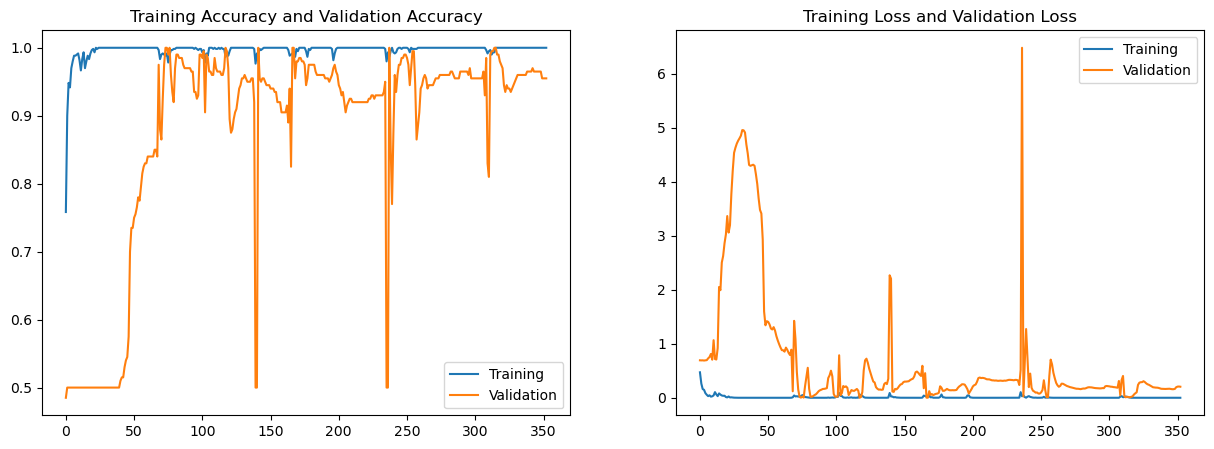

In [8]:
with open("trainHistoryDict",'rb') as f :
    history = pickle.load(f)

    

fig= plt.figure(figsize=(15,5))

ax0 = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)

ax0.plot(history['accuracy'])
ax0.plot(history['val_accuracy'])
ax0.legend(['Training' , 'Validation'],loc='lower right')
ax0.title.set_text("Training Accuracy and Validation Accuracy")

ax1.plot(history['loss'])
ax1.plot(history['val_loss'])
ax1.legend(['Training' , 'Validation'])
ax1.title.set_text("Training Loss and Validation Loss")
plt.show()

### Loading Model

In [70]:
modelX = load_model('model_archX')

### Prediction

In [71]:
predicted_labels = modelX.predict(test_images)
predicted_labels = np.round(predicted_labels)


7/7 [==============================] - 3s 409ms/step


### Judging Metrics

In [72]:
print("Precision : ",metrics.precision_score(test_labels,predicted_labels))
print("Recall : ",metrics.recall_score(test_labels,predicted_labels))
print("F1-score : ",metrics.f1_score(test_labels,predicted_labels))

Precision :  1.0
Recall :  1.0
F1-score :  1.0
